In [2]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [3]:
df = pd.read_excel("DatasetTelegramLibro.xlsx")
df.head()

,Muestra_ID,USERNAME,VIP_credentials,VIP_group,User_status,PASSWORD,MD5,SHA256,SHA512,SHA1,...,Engagement_rate,Mentions,Posts_day,Reposts,Channel_country,FILE_NAME,Results_file,Country_file_name,TOTAL,RISK
0,1.1,pablopiedrabuena@telebot.com,Vip,Ciber,Active,-P#%1NZoH7NZ,b5262d1151b996f12737e49fa2167fbc,a4799b6642c076748357843a07c0d1bcd3e5eb75ccc0d3...,8d10e6af68a519bf194f880940bb803862320564612323...,84fe8d4c552ef52149c7fb0d80060e51275f1847,...,17.58,21,2,10,Other,Ch.txt,1,Other,73.223273,High
1,2.1,davidgarcia@telebot.com,Vip,Ciber,Active,uucp,45b9cfabd8945aa221eb15c629bbf760,730b5353b8edd9b56300b355db37cc39d9da119a68cb1e...,df0f9be2269968c7759fe4e56092f9231f457e5a96a968...,a2dd138f615b6351bd5307c991d6790b5e8c5d9b,...,15.52,25,2,11,Other,France.txt,1,Other,73.827687,High
2,50.1,alvaroafonso@telebot.com,Vip,Ciber,Active,netamin,f350f792fe650c0f858e0cae9cc5a6c7,f860097832f116d4a69b629e712afec9bcba8d3984fec7...,162e3ffef02c08a0b8005b991b2b31db4da76d579f12d4...,0870c592f92eb3d6ba136df5ee4086dd2d0ae21a,...,19.61,21,3,7,Other,Europe.txt,1,Europe,72.340851,High
3,3.1,miguelchacon@telebot.com,Vip,Ciber,Active,pepe,926e27eecdbc7a18858b3798ba99bddd,7c9e7c1494b2684ab7c19d6aff737e460fa9e98d5a234d...,974f3036f39834082e23f4d70f1feba9d4805b3ee2cedb...,265392dc2782778664cc9d56c8e3cd9956661bb0,...,1.00,1,1,1,Other,900K.txt,1,Other,71.606993,High
4,4.1,eduardobejarano@telebot.com,Vip,Ciber,Active,WrMD4fw7,33763d048d98dc38fe9c100067fae7ca,13da9707d7e30adcfa062bf32d8a51219408d86caf5665...,464304b29b44eca6c123853a57b4759268aa2383bb08af...,99cf2501581ed28d097847282e50fab8b5df53b3,...,18.89,68,13,14,Other,44K.txt,1,Other,75.450268,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Muestra_ID         197 non-null    float64
 1   USERNAME           197 non-null    object 
 2   VIP_credentials    197 non-null    object 
 3   VIP_group          197 non-null    object 
 4   User_status        197 non-null    object 
 5   PASSWORD           197 non-null    object 
 6   MD5                197 non-null    object 
 7   SHA256             197 non-null    object 
 8   SHA512             197 non-null    object 
 9   SHA1               197 non-null    object 
 10  Password_update    197 non-null    object 
 11  Password_type      197 non-null    object 
 12  Leaked_password    197 non-null    int64  
 13  Password_pattern   197 non-null    object 
 14  Guesses_discover   197 non-null    float64
 15  Cracking_time      197 non-null    float64
 16  Password_strength  197 non

## Análisis Multivariado
### Preprocesamiento de Datos
Para algunos de los analisis multivariados conviene realizar un preprocesamiento para unificar los datos del dataframe:
* Eliminar columnas irrelevantes
* Trnasformar variables categóricas en numéricas : OneHotEncoder
* Escalar todos los datos a valores entre -1 y 1 : MinMaxEscaler


In [5]:
metadata_columns = ['Muestra_ID', 'USERNAME', 'PASSWORD', 'MD5', 'SHA256', 'SHA512', 'SHA1', 'CHANNEL_NAME', 'FILE_NAME', 'RISK']

In [6]:
# Eliminación de columnas de metadatos
df = df.drop(columns=metadata_columns)
# Datos a procesar
X = df.drop(columns=['TOTAL'])
# Variable a predecir
y = df['TOTAL']
X.head()

,VIP_credentials,VIP_group,User_status,Password_update,Password_type,Leaked_password,Password_pattern,Guesses_discover,Cracking_time,Password_strength,...,Chat_type,Channel_privacity,Subscribers,Engagement_rate,Mentions,Posts_day,Reposts,Channel_country,Results_file,Country_file_name
0,Vip,Ciber,Active,Not actual,Personal password,0,Bruteforce,12.00,1.000000e+11,4,...,Channel,Public,8845,17.58,21,2,10,Other,1,Other
1,Vip,Ciber,Active,Not actual,Personal password,2000,Bruteforce,4.00,1.000100e+03,1,...,Channel,Public,9393,15.52,25,2,11,Other,1,Other
2,Vip,Ciber,Active,Not actual,Personal password,7,Bruteforce,6.62,4.144000e+05,2,...,Channel,Public,2340,19.61,21,3,7,Other,1,Europe
3,Vip,Ciber,Active,Not actual,Personal password,13277,Repeats,2.31,2.030000e+01,0,...,Channel,Private,508,1.00,1,1,1,Other,1,Other
4,Vip,Ciber,Active,Not actual,Personal password,0,Bruteforce,8.00,1.000000e+07,2,...,Channel,Public,7852,18.89,68,13,14,Other,1,Other


* Transformar variables categóricas con OneHotEncoder

In [7]:
# Selección Variables Categoricas
categorical = X.select_dtypes(include=['object']).columns
# Creación del codificador OneHot
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore')
# Ajuste del codificador
ohe.fit(X[categorical])
# Transformación de las variables categóricas
# Nota: Cuando las variables son binarias, crea una única columna rellenando con 1 o 0, si hay más de dos opciones crea una columna para cada una de ellas
X_ohe = ohe.transform(X[categorical]) 
# Creación de un DataFrame con las variables categóricas codificadas
X_ohe = pd.DataFrame(X_ohe.toarray(), columns=ohe.get_feature_names_out())
# Eliminación de las variables categóricas originales
X = X.drop(columns=categorical)
# Unión de las variables categóricas codificadas con las numéricas
X = pd.concat([X, X_ohe], axis=1)
X.head()

,Leaked_password,Guesses_discover,Cracking_time,Password_strength,Password_entropy,Subscribers,Engagement_rate,Mentions,Posts_day,Reposts,...,Password_pattern_Bruteforce,Password_pattern_Dictionary,Password_pattern_Repeats,Password_pattern_Sequence,Chat_type_Group,Channel_privacity_Public,Channel_country_Spain,Country_file_name_Europe,Country_file_name_Other,Country_file_name_Spain
0,0,12.00,1.000000e+11,4,78.66,8845,17.58,21,2,10,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2000,4.00,1.000100e+03,1,18.80,9393,15.52,25,2,11,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7,6.62,4.144000e+05,2,32.90,2340,19.61,21,3,7,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,13277,2.31,2.030000e+01,0,18.80,508,1.00,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,8.00,1.000000e+07,2,47.63,7852,18.89,68,13,14,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


* Escalar datos numéricos

In [8]:
# Selección de variables numéricas
numerical = X.select_dtypes(include=['int64', 'float64']).columns
# Creación del escaler de variables
# Nota: No es posible aplicar StandardScaler porque da error con las variables negativas
scaler = MinMaxScaler()
# Ajuste del escaler (entre 0 y 1)
scaler.fit(X[numerical], y)
# Transformación de las variables numéricas
X[numerical] = scaler.transform(X[numerical])
X.head()
X.to_excel('PreprocessedData.xlsx')


### Select K Best
Con el método SelectKBest se seleccionan las K características más influyentes sobre la variable dependiente según un puntuaje estadístico, en este caso “f_regression”, que basa la selección de características en su relación con la variable dependiente usando correlaciones.

In [9]:
# Número de variables a seleccionar
k = 12
# Selección de variables
selector = SelectKBest(score_func=f_regression, k=k)
# Ajuste del selector
selector.fit(X, y)
# Transformación de las variables
X_selected = selector.transform(X)


In [10]:
# Obtención de los indices de las características seleccionadas
selected_feature_indices = selector.get_support(indices=True)
# Obtención de nombres de las variables de las características seleccionadas
selected_features = X.columns[selected_feature_indices]
# Subconjunto de datos con las características seleccionadas
selected_data = X[selected_features]
selected_data.head()

,Guesses_discover,Password_strength,Password_entropy,Subscribers,VIP_credentials_Vip,VIP_group_Ceo,VIP_group_Ciber,VIP_group_Directiva,VIP_group_Otros,User_status_Inactive,Country_file_name_Other,Country_file_name_Spain
0,0.795918,1.00,0.819985,0.928671,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.251701,0.25,0.171237,0.987539,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.429932,0.50,0.324049,0.229885,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.136735,0.00,0.171237,0.033086,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.523810,0.50,0.483689,0.822000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
scores = selector.scores_
scores

array([3.24790115e-02, 2.82171877e+00, 2.48460322e-01, 4.46208091e+00,
       4.21442007e+00, 2.86903659e+00, 8.45943770e-01, 1.71665004e+00,
       5.24252217e-01, 1.39738371e+00, 1.13580104e+00, 2.56683894e+02,
       3.17662564e+00, 1.18144635e+02, 2.34433669e+00, 2.56683894e+02,
       5.04351538e+02, 1.58536765e-02, 9.80366248e-01, 6.19568599e-02,
       8.85323312e-01, 1.14817709e+00, 5.80848942e-01, 1.74739132e+00,
       2.78043613e-03, 3.45264512e-02, 7.27157664e-02, 9.69068441e-02,
       9.91540829e-02, 2.61292681e+00, 4.60616464e+00])

In [12]:
selected_scores = selector.scores_[selected_feature_indices]
selected_scores_df = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})
# delete the label column
selected_scores_df = selected_scores_df.drop(selected_scores_df[selected_scores_df['Feature'] == 'label'].index)
selected_scores_df = selected_scores_df.sort_values(by='Score', ascending=False)
selected_scores_df

,Feature,Score
9,User_status_Inactive,504.351538
8,VIP_group_Otros,256.683894
4,VIP_credentials_Vip,256.683894
6,VIP_group_Ciber,118.144635
11,Country_file_name_Spain,4.606165
1,Password_strength,4.462081
2,Password_entropy,4.214420
5,VIP_group_Ceo,3.176626
3,Subscribers,2.869037
0,Guesses_discover,2.821719


In [13]:
scores = selector.scores_
scores_df = pd.DataFrame({'Feature': X.columns, 'Score': scores})
# delete the label column
scores_df = scores_df.drop(scores_df[scores_df['Feature'] == 'label'].index)
scores_df = scores_df.sort_values(by='Score', ascending=False)
scores_df

,Feature,Score
16,User_status_Inactive,504.351538
15,VIP_group_Otros,256.683894
11,VIP_credentials_Vip,256.683894
13,VIP_group_Ciber,118.144635
30,Country_file_name_Spain,4.606165
3,Password_strength,4.462081
4,Password_entropy,4.214420
12,VIP_group_Ceo,3.176626
5,Subscribers,2.869037
1,Guesses_discover,2.821719


In [14]:
scores_df.to_excel('Kbest_Scores.xlsx')

<Axes: xlabel='Score', ylabel='Feature'>

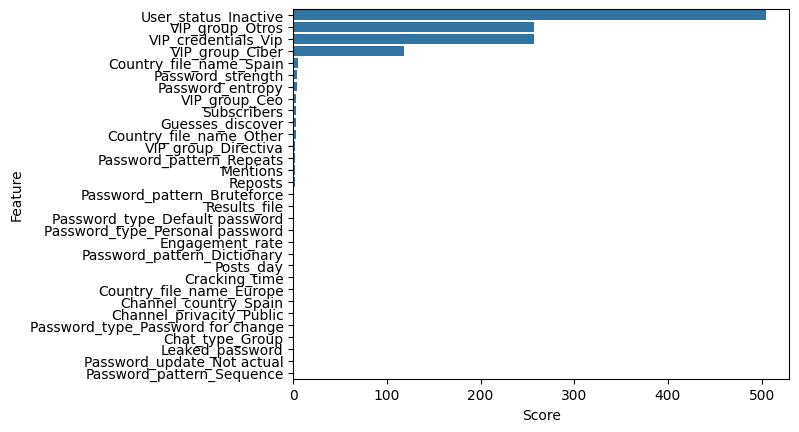

In [15]:
sns.barplot(x = "Score", y = "Feature", data = scores_df)

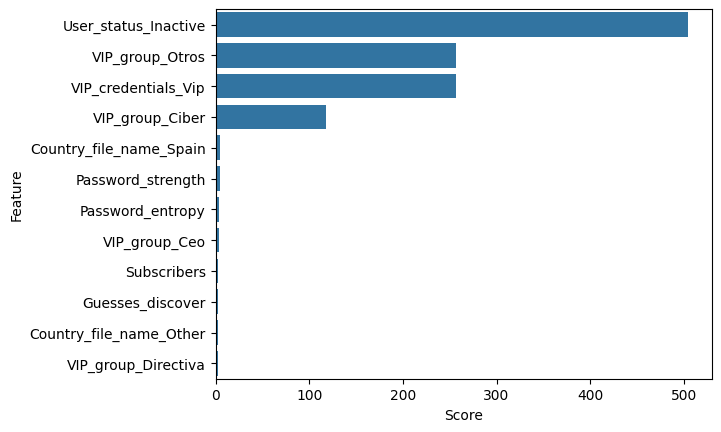

In [16]:
sns.barplot(x = "Score", y = "Feature", data = selected_scores_df)
selected_scores_df.to_excel('Kbest_Selection.xlsx')

### Multicolinealidad entre variables independientes
Creamos una matriz de correlación que incluya todas las variables con los datos preprocesados para comparar simultáneamente las relaciones entre TODOS los pares de variables del dataframe

In [17]:
pd.set_option('display.max_columns', None)

df_matrix = pd.concat([X, y], axis=1)
df_matrix

,Leaked_password,Guesses_discover,Cracking_time,Password_strength,Password_entropy,Subscribers,Engagement_rate,Mentions,Posts_day,Reposts,Results_file,VIP_credentials_Vip,VIP_group_Ceo,VIP_group_Ciber,VIP_group_Directiva,VIP_group_Otros,User_status_Inactive,Password_update_Not actual,Password_type_Default password,Password_type_Password for change,Password_type_Personal password,Password_pattern_Bruteforce,Password_pattern_Dictionary,Password_pattern_Repeats,Password_pattern_Sequence,Chat_type_Group,Channel_privacity_Public,Channel_country_Spain,Country_file_name_Europe,Country_file_name_Other,Country_file_name_Spain,TOTAL
0,0.000000e+00,0.795918,1.000000e-03,1.00,0.819985,0.928671,0.496050,0.056757,0.023256,0.666667,0.000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,73.223273
1,4.701147e-05,0.251701,9.999000e-12,0.25,0.171237,0.987539,0.437923,0.067568,0.023256,0.733333,0.000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,73.827687
2,1.645402e-07,0.429932,4.143998e-09,0.50,0.324049,0.229885,0.553330,0.056757,0.034884,0.466667,0.000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,72.340851
3,3.120857e-04,0.136735,2.010000e-13,0.00,0.171237,0.033086,0.028217,0.002703,0.011628,0.066667,0.000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,71.606993
4,0.000000e+00,0.523810,1.000000e-07,0.50,0.483689,0.822000,0.533014,0.183784,0.151163,0.933333,0.000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,75.450268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.000000e+00,0.523810,1.000000e-07,0.50,0.483689,0.525943,0.483070,0.435135,0.046512,0.266667,0.875,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,77.449543
193,0.000000e+00,0.782313,6.720000e-04,1.00,0.819985,0.219572,0.919018,0.008108,0.023256,0.200000,0.875,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,74.334728
194,9.839501e-05,0.183673,9.980000e-13,0.00,0.120299,0.851756,0.459932,0.200000,0.139535,0.933333,0.875,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,79.371522
195,8.246574e-02,0.036735,5.000000e-15,0.00,0.146418,0.512837,0.652652,0.702703,0.104651,0.200000,0.875,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,78.940622


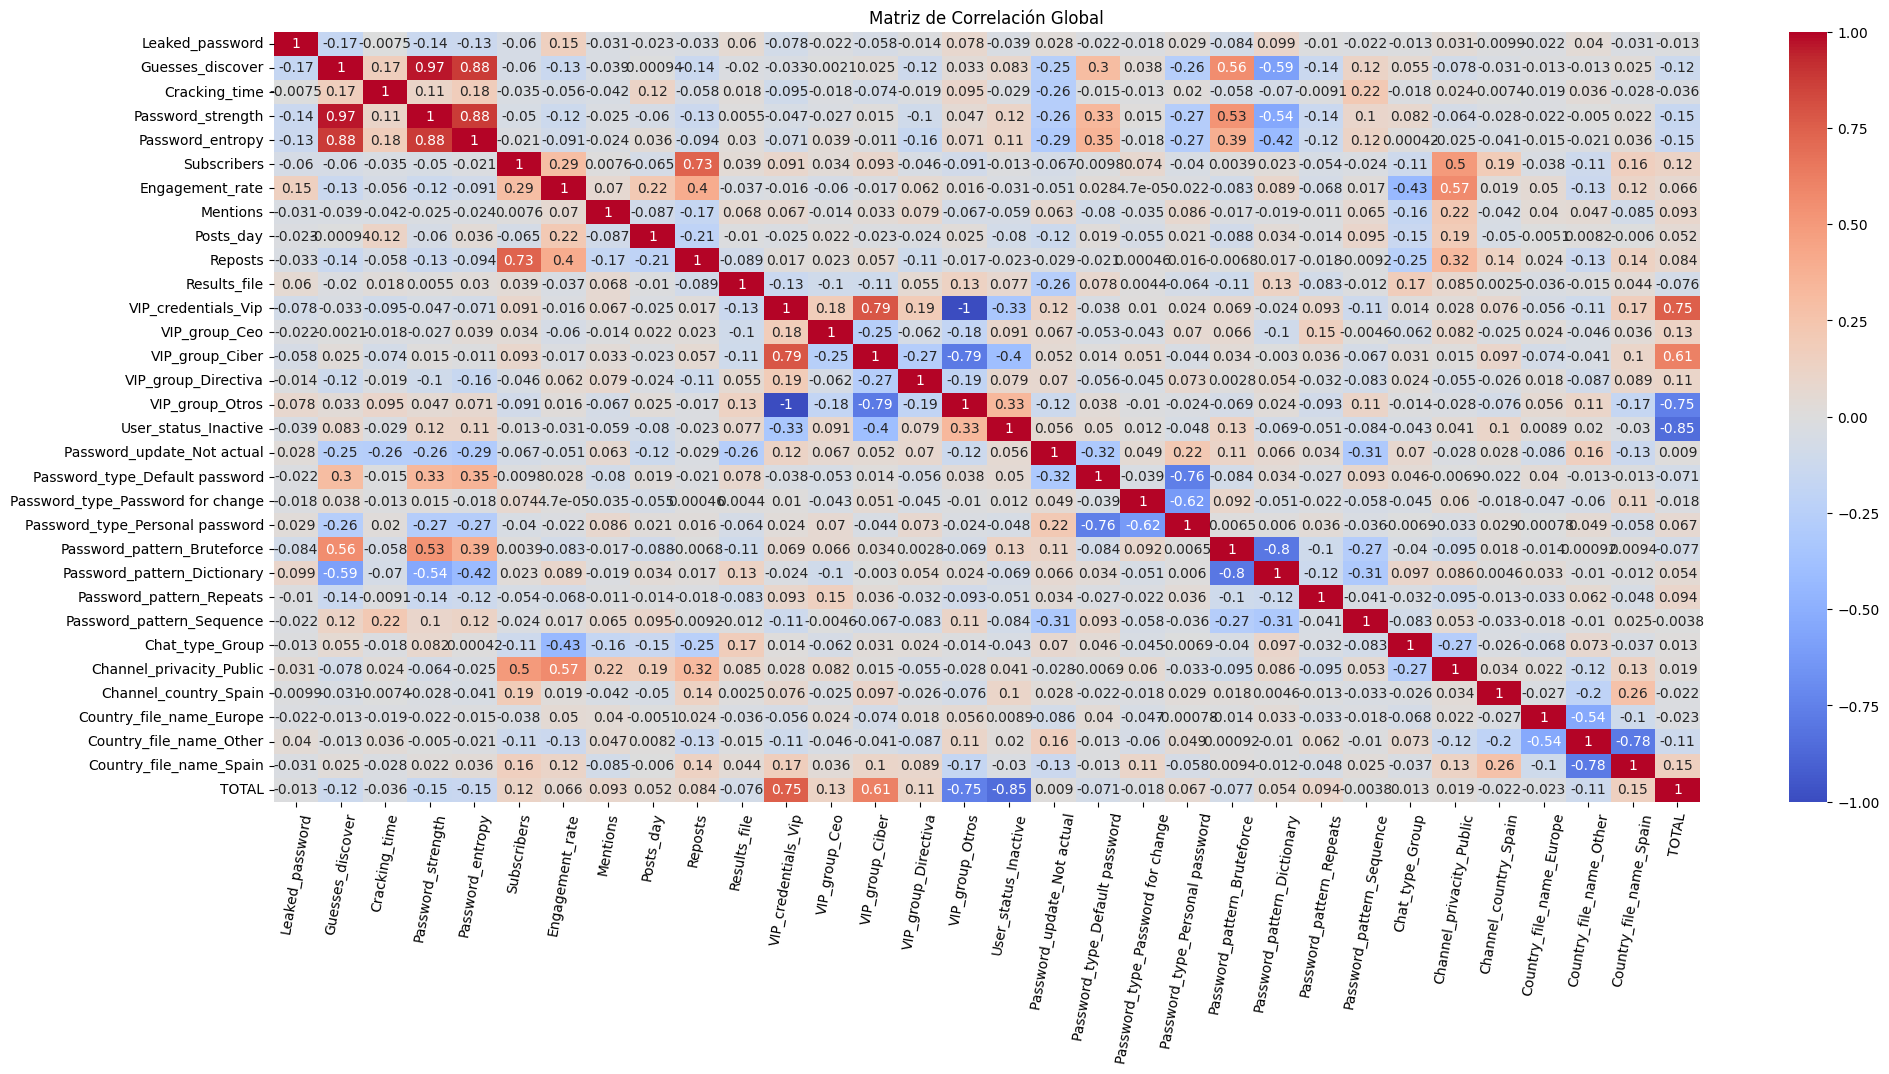

In [18]:
coef=df_matrix.corr(method='pearson')
plt.figure(figsize=(23,10))
sns.heatmap(coef, annot=True, vmin=-1, vmax=1, cmap='coolwarm', center=0)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.title('Matriz de Correlación Global')
plt.show()

In [19]:
corr = df_matrix.corr()
corr[['TOTAL']].sort_values(by = 'TOTAL',ascending = False).style.background_gradient()


,TOTAL
TOTAL,1.000000
VIP_credentials_Vip,0.753845
VIP_group_Ciber,0.614235
Country_file_name_Spain,0.151909
VIP_group_Ceo,0.126607
Subscribers,0.120415
VIP_group_Directiva,0.108993
Password_pattern_Repeats,0.094241
Mentions,0.093416
Reposts,0.084351


#### Matriz filtrada
Creamos una matriz filtrada que muestre únicamente los índices menores que -0.5 o mayores que 0.5, para identificar más fácilmente las correlaciones elevadas entre variables. 

Text(0.5, 1.0, 'Matriz de Correlación (Correlaciones <= -0.5 y >= 0.5')

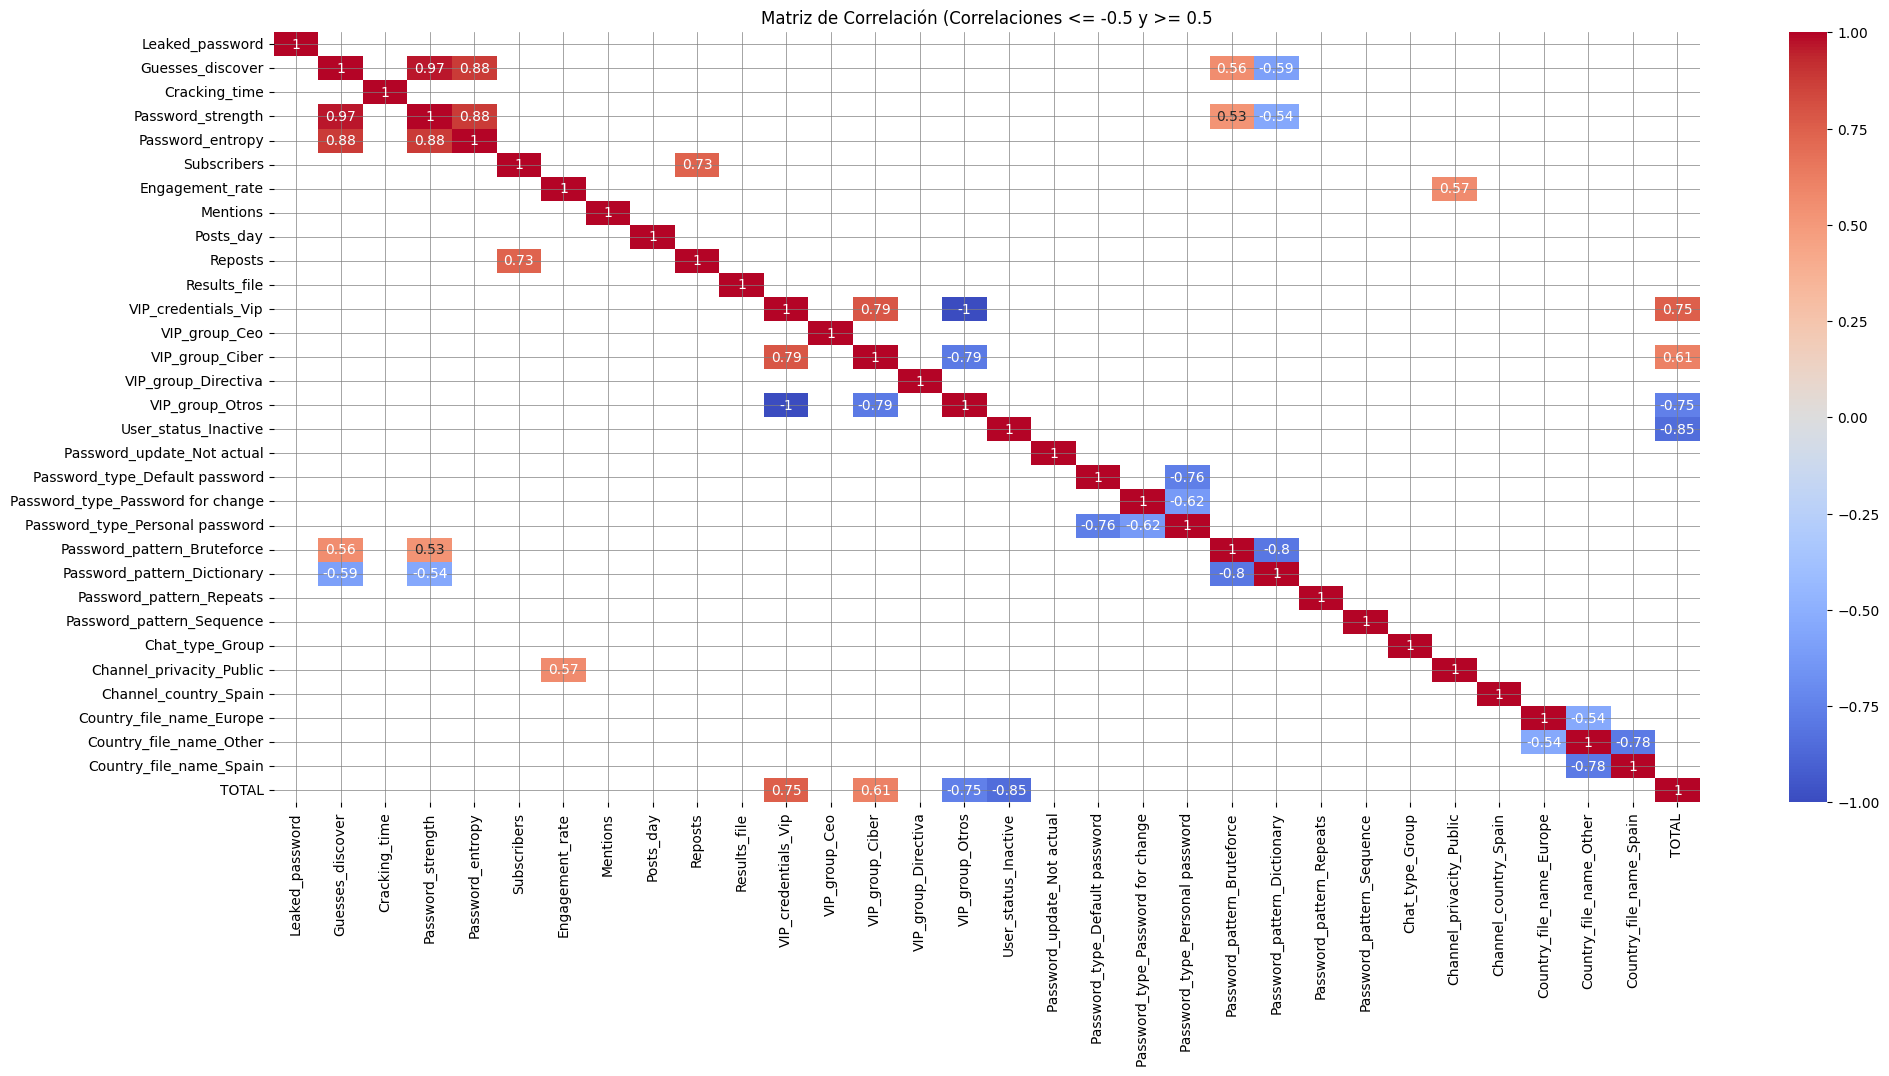

In [20]:
mascara = np.abs(coef) >= 0.5
matriz_filtrada = coef[mascara]
plt.figure(figsize=(23,10))

ax = sns.heatmap(matriz_filtrada, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
ax.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Matriz de Correlación (Correlaciones <= -0.5 y >= 0.5')


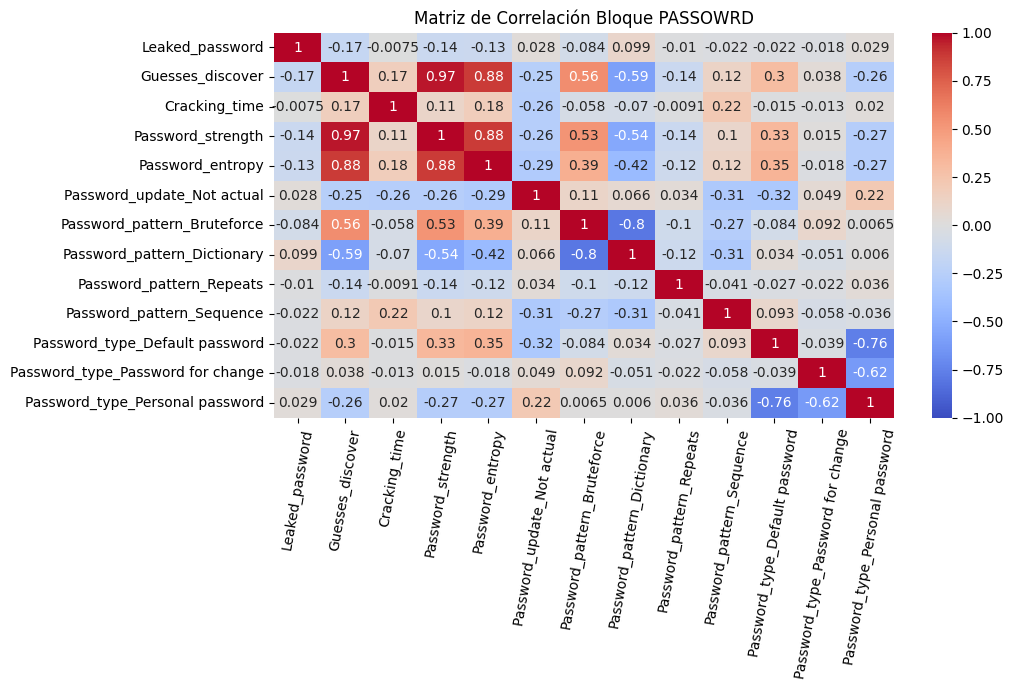

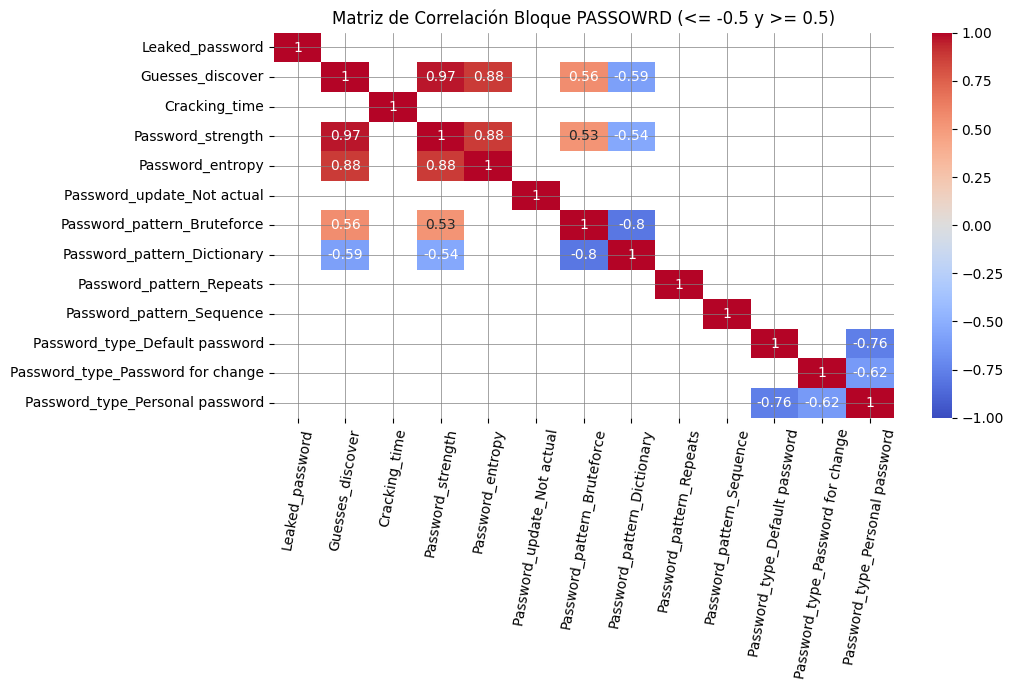

In [21]:
m_user = df_matrix[['VIP_credentials_Vip', 'VIP_group_Ceo', 'VIP_group_Ciber', 'VIP_group_Directiva', 'VIP_group_Otros', 'User_status_Inactive']]
m_password = df_matrix[['Leaked_password', 'Guesses_discover', 'Cracking_time', 'Password_strength', 'Password_entropy', 'Password_update_Not actual', 'Password_pattern_Bruteforce', 'Password_pattern_Dictionary', 'Password_pattern_Repeats', 'Password_pattern_Sequence', 'Password_type_Default password', 'Password_type_Password for change', 'Password_type_Personal password']]
m_channel = df_matrix[['Subscribers', 'Mentions', 'Posts_day', 'Engagement_rate', 'Reposts', 'Chat_type_Group', 'Channel_privacity_Public', 'Channel_country_Spain']]
m_file = df_matrix[['Results_file', 'Country_file_name_Europe', 'Country_file_name_Spain', 'Country_file_name_Other']]

coef=m_password.corr(method='pearson')
plt.figure(figsize=(10,5))
ax = sns.heatmap(coef, annot=True, vmin=-1, vmax=1, cmap='coolwarm', center=0)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.title('Matriz de Correlación Bloque PASSOWRD')
plt.show()

mascara = np.abs(coef) >= 0.5
matriz_filtrada = coef[mascara]
plt.figure(figsize=(10,5))

ax = sns.heatmap(matriz_filtrada, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
ax.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.title('Matriz de Correlación Bloque PASSOWRD (<= -0.5 y >= 0.5)')
plt.show()

Observaciones:
-	Todos los pares de variables con mayor índice de relación se corresponden a variables del mismo bloque, no hay ningún par de distinto bloque que tengan un índice de correlación mayor a 0.5. 
-	No existe correlación significativa entre pares de variables de distinto bloque, es decir que cada bloque se comporta de forma independiente con respecto a la variable objetivo. 
-	Se aprecia multicolinealidad entre variables del mismo bloque, es decir, que las variables dentro de un mismo bloque miden aspectos diferentes del mismo concepto o fenómeno, lo que lleva a una alta correlación entre ellas.


## Gráficas hechas con Dash

In [27]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
from base64 import b64encode
import io
import tempfile
import numpy as np


In [23]:
# Función para asignar categorías de severidad a los valores totales de la predicción del riesgo
def cvss_score(x):
    if x == 0:
        return 'None'
    elif x < 40:
        return 'Low'
    elif x < 70:
        return 'Medium'
    elif x < 90:
        return 'High'
    else:
        return 'Critical'

In [24]:
df['RISK'] = df['TOTAL'].apply(cvss_score)

### Respresentación del Análisis Discriminante del Bloque USERS

In [30]:
grouped_df = df.groupby(['VIP_group', 'User_status', 'RISK']).size().reset_index(name='count')

app = Dash(__name__)

app.layout = html.Div(
    [
        html.H4("Analysis of user block"),
        dcc.Graph(id="graph"),
        html.A(
            html.Button("Download as HTML"),
            id="download-link",
            href="",
            download="plotly_graph.html"
        )
    ]
)

@app.callback(
    Output("graph", "figure"),
    Output("download-link", "href"),
    Input("graph", "id")
)
def display_graph(_):
    # Create the grouped and stacked bar chart
    fig = px.bar(
        grouped_df,
        x="RISK",
        y="count",
        color="User_status",
        barmode='stack',
        facet_col="VIP_group",
        category_orders={"VIP_group": ["Ceo", "Directiva", "Ciber", "Otros"]}
        # category_orders={"RISK": ["Very high", "High", "Medium", "Low", "Very low"]}
    )
    
    # Create the HTML content for download
    with tempfile.NamedTemporaryFile(delete=False, suffix=".html") as tmpfile:
        tmpfile.write(fig.to_html(full_html=True).encode())
        tmpfile.seek(0)
        html_content = tmpfile.read()
    encoded = b64encode(html_content).decode()
    href = "data:text/html;base64," + encoded

    return fig, href

if __name__ == "__main__":
    app.run_server(port=8051, debug=True)

### Representación del Análisis de Selección de Características con Select K Best

In [31]:
app = Dash(__name__)
df = pd.read_excel("Kbest_Selection.xlsx")
fig = px.bar(df, x='Score', y='Feature', color='Score')
fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Crear el archivo HTML temporalmente y codificarlo en base64
def generate_html(fig):
    with tempfile.NamedTemporaryFile(delete=False, suffix=".html") as tmpfile:
        tmpfile.write(fig.to_html(full_html=True).encode())
        tmpfile.seek(0)
        html_content = tmpfile.read()
    encoded = b64encode(html_content).decode()
    href = "data:text/html;base64," + encoded
    return href

href = generate_html(fig)

# Define the layout
app.layout = html.Div(children=[
    html.H1(children='Top 12 Significant Features'),
    dcc.Graph(
        id='bar-chart',
        figure=fig
    ),
    html.A(
        html.Button("Download as HTML"),
        id="download-link",
        href=href,
        download="plotly_graph.html"
    )
])

if __name__ == "__main__":
    app.run_server(port=8052, debug=True)

### Representación del Análisis Multivariado de las características del bloque PASSWORD

In [32]:
df = pd.read_excel("DatasetTelegramLibro.xlsx")

df = df.iloc[:101, :]
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container(
    dbc.Row(
        [
            dbc.Col(
                [
                    html.Label("Select password type:"),
                    dcc.Dropdown(
                        id="type",
                        options=[{'label': grp, 'value': grp} for grp in df.Password_type.unique()],
                        value='Personal password',
                        clearable=False,
                    ),
                ],
                width=3,
            ),
            dbc.Col(
                [dcc.Graph(id="graph")],
                width=9,
            ),
        ]
    )
)

@app.callback(
    Output("graph", "figure"),
    [Input("type", "value")]
)

def generate_graph(type):
    dff = df.query(f"Password_type == '{type}'")
    
    counts = dff.groupby(['Password_strength', 'PASSWORD', 'Password_entropy']).size().reset_index(name='count')
    
    fig = px.sunburst(
        counts,
        path=["Password_strength", "PASSWORD"],
        values="count",
        color="Password_entropy",
        hover_data=["count"],
        color_continuous_scale="balance",
        range_color=[0, 100],  
        color_continuous_midpoint=np.average(df["Password_entropy"]),
    )

    fig.update_layout(margin=dict(l=0, r=0, t=0, b=0), width=800, height=800)
    return fig


if __name__ == "__main__":
    app.run_server(port=8053, debug=True)

### Representación del Análisis Multivariado de las características del bloque USERS vs PASSWROD

In [33]:
df = df.iloc[:101, :]
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container(
    dbc.Row(
        [
            dbc.Col(
                [
                    html.Label("Select VIP Group:"),
                    dcc.Dropdown(
                        id="group",
                        options=[{'label': grp, 'value': grp} for grp in df.VIP_group.unique()],
                        value='Ceo',
                        clearable=False,
                    ),
                    # html.Label("Select Status:"),
                    # dcc.RadioItems(
                    #     id="status",
                    #     options=[
                    #         {'label': 'Active', 'value': 'Active'},
                    #         {'label': 'Inactive', 'value': 'Inactive'},
                    #     ],
                    #     value='Active',
                    #     inline=True,
                    # ),
                ],
                width=3,
            ),
            dbc.Col(
                [dcc.Graph(id="graph")],
                width=9,
            ),
        ]
    )
)


@app.callback(
    Output("graph", "figure"),
    [Input("group", "value")] #, Input("status", "value")
)

def generate_graph(group):
    dff = df.query(f"VIP_group == '{group}'")
    
    counts = dff.groupby(['Password_type', 'PASSWORD', 'TOTAL']).size().reset_index(name='count')
    
    fig = px.sunburst(
        counts,
        path=["Password_type", "PASSWORD"],
        values="count",
        color="TOTAL",
        hover_data=["count"],
        color_continuous_scale="balance",
        range_color=[0, 100],  
        color_continuous_midpoint=np.average(df["TOTAL"]),
    )

    fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
    return fig


if __name__ == "__main__":
    app.run_server(port=8054, debug=True)


### Representación del Diagrama de Dispersión de las variables del bloque PASSWORD

Este diagrama se realiza después de la matriz de correlación por bloques para visualizar aquellas características que presentaban mayor índice de correlación del bloque de contraseñas

In [34]:
app = Dash(__name__)

app.layout = html.Div(
    [
        html.H4("Interactive scatter plot with password features and risk categories"),
        dcc.Graph(id="scatter-plot"),
        html.P("Filter by password strength:"),
        dcc.RangeSlider(
            id="range-slider",
            min=0,
            max=4,
            step=1,
            marks={0: "0", 4: "4"},
            value=[0, 4],
        ),
    ]
)

color_map = {
    '0': 'red',
    '1': 'orange',
    '2': 'yellow',
    '3': 'blue',
    '4': 'green'
}

@app.callback(
    Output("scatter-plot", "figure"),
    Input("range-slider", "value"),
)
def update_chart(slider_range):
    low, high = slider_range
    mask = (df["Password_strength"] >= low) & (df["Password_strength"] <= high)
    fig = px.scatter(
        df[mask],
        x="Guesses_discover",
        y="Password_entropy",
        color="Password_strength",
        # size='TOTAL',
        hover_data=["Password_strength"],
        color_discrete_map=color_map,
        trendline="ols"
    )
    fig.update_traces(marker=dict(size=10))  
    return fig


if __name__ == "__main__":
    app.run_server(port=8055, debug=True)